# Budgetting App
This  is a budgetting app made to forecast salary after taxes, expenses, savings, and investments.
I intend to use this project primarily to apply introductory financial concepts as I am trying to understand my personal finances and to practise data analysis and visualisation in Python. In the future this project could evolve into a personal finance forecasting app to help folks understanding their finances and planning for their financial goals, including mortgage payment, further education, savings, portfolio management, choosing between jobs, cities and you name it!

## Salary and taxes
* Determine your starting salary 
* Determine average annual tax rate
* Calculate your take home salary after taxes
* Calculate your monthly salary after taxes


In [16]:
# Enter your annual salary
salary = 34000

# Assume a tax rate of 10.1%
tax_rate = 0.101

# Calculate your salary after taxes
salary_after_taxes = (1-tax_rate) * salary
print("Your salary after taxes is: " + str(round(salary_after_taxes, 2)))

# Calculate your monthly salary
monthly_salary = salary_after_taxes/ 12
print("Your monthly salary after taxes is: " + str(round(monthly_salary, 2)))

Your salary after taxes is: 30566.0
Your monthly salary after taxes is: 2547.17


## Monthly budget and savings
* Determine your monthly savings rate
* Compute your monthly savings
* Compute your monthly budget from your montly salary minus your monthly savings
* Allocate your budget to categories
* View breakdown of categories on plot

Your monthly savings are: 407.55
Your monthly budget is: 2139.62
2136.12 have been allocated to your budget
      Category  Amount  Percentage of budget
0         Rent  300.00                 14.04
1    Groceries  255.93                 11.98
2    Utilities  337.38                 15.79
3    Transport   87.50                  4.10
4  Restaurants  250.00                 11.70


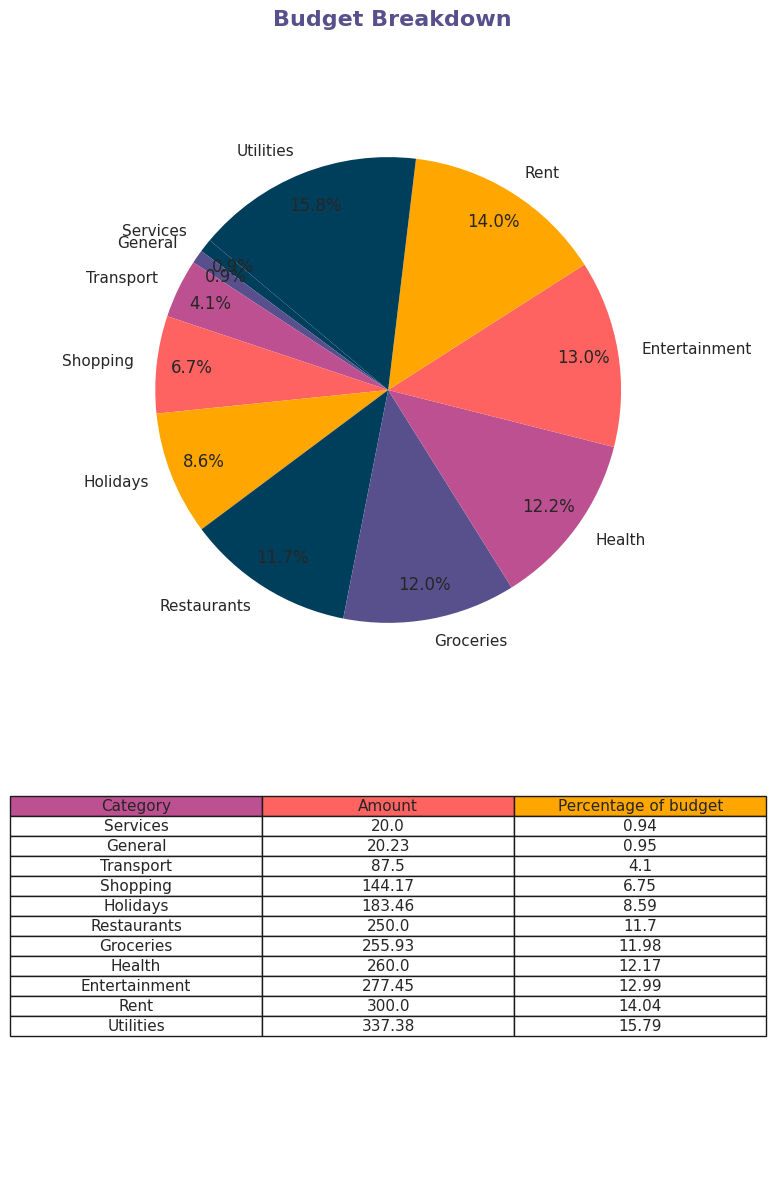

In [21]:
# Determine your monthly savings rate
monthly_savings_rate = 0.16

# Compute your monthly savings
monthly_savings = monthly_savings_rate * monthly_salary
print("Your monthly savings are: " + str(round(monthly_savings, 2)))

# Compute your monthly budget after savings
monthly_budget = monthly_salary - monthly_savings
print("Your monthly budget is: " + str(round(monthly_budget, 2)))

# Import pandas as pd
import pandas as pd

# Create a list of dictionaries for your budget's categories
budget_list_of_dict = [
    {"Category": "Rent", "Amount": 300},
    {"Category": "Groceries", "Amount": 255.93},
    {"Category": "Utilities", "Amount": 337.38},
    {"Category": "Transport", "Amount": 87.50},
    {"Category": "Restaurants", "Amount": 250.0},
    {"Category": "Entertainment", "Amount": 277.45},
    {"Category": "Health", "Amount": 260},
    {"Category": "General", "Amount": 20.23},
    {"Category": "Services", "Amount": 20},
    {"Category": "Holidays", "Amount": 183.46},
    {"Category": "Shopping", "Amount": 144.17}
]

# Convert to a pandas DataFrame
budget_df = pd.DataFrame(budget_list_of_dict)

# Calculate and display total allocated budget
total_budget = budget_df["Amount"].sum()
print(f"{round(total_budget, 2)} have been allocated to your budget")

# Calculate percentage of budget for each category
budget_df["Percentage of budget"] = round(budget_df["Amount"] / total_budget*100,2)

# Display the DataFrame with the breakdown of the budget
print(budget_df.head())

# Import matplotlib.pyplot as plt and seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# Sort data on the Amount column
budget_df = budget_df.sort_values("Amount")

# Set the Seaborn style and color palette
sns.set(style="ticks")
colors = ["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"]

# Create a minimalist pie chart with no lines between slices
plt.figure(figsize=(8, 12))

# Subplot for the pie chart
plt.subplot(2,1,1)
plt.pie(
    budget_df["Amount"],
    labels=budget_df["Category"],
    colors=colors,
    autopct="%1.1f%%",
    startangle=140,
    pctdistance=0.85,  # Move percentage labels inward
    wedgeprops={"linewidth": 0}  # Remove lines between slices
)
plt.axis("equal")  # Equal aspect ratio ensures the pie chart is circular.

# Subplot for the budget table
plt.subplot(2,1,2)
plt.axis("off")  # Turn off axes for the table

# Create a table with budget information
budget_table = plt.table(cellText=budget_df.values,
                         colLabels=budget_df.columns,
                         cellLoc="center",
                         loc="center",
                         colColours= ["#bc5090", "#ff6361", "#ffa600"])

# Adding a modern title
plt.suptitle("Budget Breakdown", fontsize=16, fontweight="bold", color="#58508d")

plt.tight_layout(rect=[0, 0, 1, 0.92])  # Adjust layout for subplots and title

# Display the plot
plt.show()

## Forecast salary growth and cost of living
* Determine your forecast period in years
* Determine your annual salary growth rate
* Determine the average annual inflation rate
* Forecast salary growth and cost of living 

[33048. 35802. 38556. 41616. 44982.]


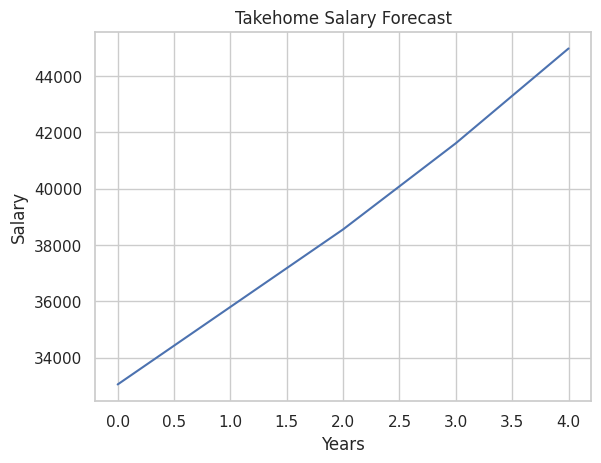

In [9]:
# Determine forecast period
forecast_period = 5

# Determine annual salary growth
salary_growth_rate = 0.08

# Determine annual average inflation rate
inflation_rate = 0.03

# Import numpy as np
import numpy as np

# Forecast the annual cumulative growth of your salary
cumulative_salary_growth_forecast = np.cumprod(np.repeat(1 + salary_growth_rate, forecast_period))

# Forecast salary growth rounded to 2 decimal places
salary_growth = salary_after_taxes * np.round(cumulative_salary_growth_forecast, 2)
print(salary_growth)

# Set the Seaborn style
sns.set(style="whitegrid")

# Create a line plot
plt.plot(salary_growth)

# Set x and y axis titles
plt.xlabel("Years")
plt.ylabel("Salary")

# Set the plot title
plt.title("Takehome Salary Forecast")

# Display the plot
plt.show()